In [1]:
import ramCOH.functions as f
import ramCOH.processing as ram
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout()

In [2]:
ol_file = "./olivine/PI052-05_2021_11_29_15_47_53_532nm_Edge_100%_x100_VIS_LWD_H50_1800 (450-850nm)_10s x 2_01.txt"
x, y = np.genfromtxt(ol_file, unpack=True)

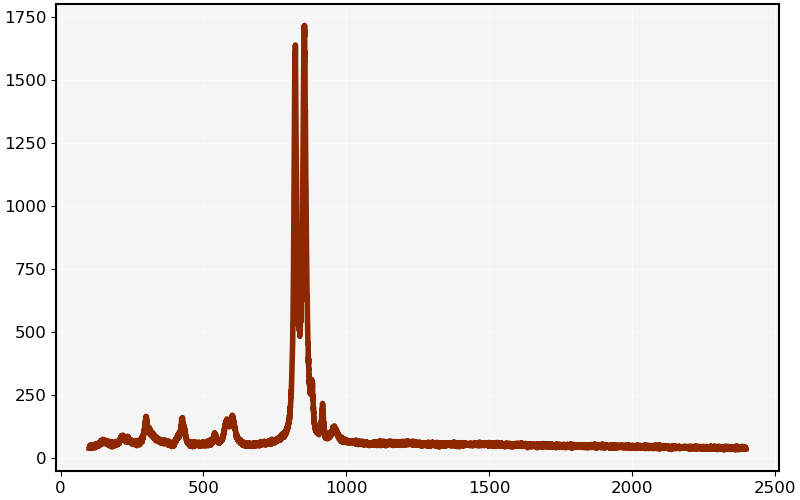

In [3]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.show()

In [4]:
birs = np.array(
    [
        [100, 140],
        [370, 380],
        [470, 515],
        [680, 740],
        [1020, 4000]
    ]
)

In [12]:

olivine = ram.olivine(x, y)
olivine.baselineCorrect(birs, smooth=1e-7)
olivine.deconvolve(noise_threshold=1.8, prominence=2., fit_window=4, baseline0=True)

noise, spline = f._calculate_noise(olivine.x, olivine.intensities["BC"])

In [13]:
paramDict = [
    {"center": i, "amplitude": j, "width": k, "shape": l, "baselevel": m}
    for _, (i, j, k, l, m) in enumerate(zip(*olivine.deconvolution_parameters))
]

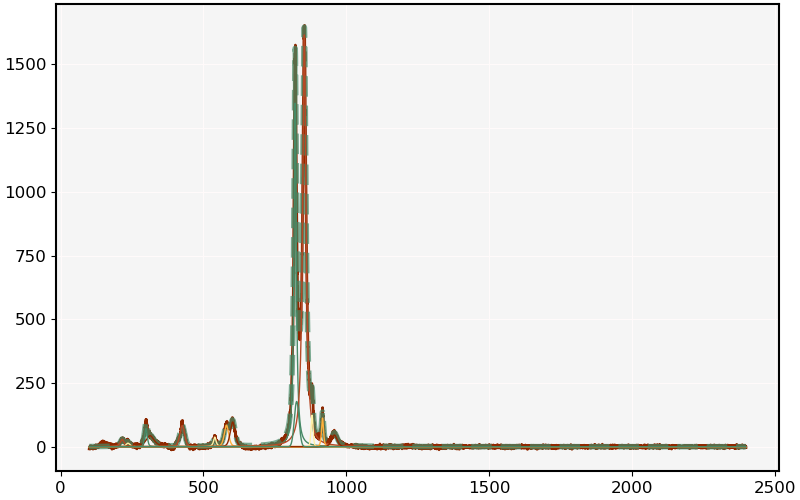

In [14]:
baselevel = sum(olivine.deconvolution_parameters[-1])

%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(olivine.x, olivine.intensities["BC"], linewidth=2)
# plt.plot(olivine.x, olivine.baseline)
plt.plot(olivine.x, f.sum_GaussLorenz(olivine.x, *olivine.deconvolution_parameters) - baselevel, alpha=0.7, linestyle="dashed")
# plt.plot(x, spline)
for curve in paramDict:
    plt.plot(olivine.x, f.GaussLorentz(olivine.x, **curve), linewidth=1)

In [ ]:
amp, cent, wid = f._find_peak_parameters(x, olivine.intensities["BC"], 2)
print(amp, cent, wid)
ranges = f._get_peakFit_ranges(cent, wid, fit_window=4)
ranges

In [ ]:
range = ranges[1]
xtrim, ytrim = f._trimxy_ranges(x, olivine.intensities["BC"], range)
params, *_ = f.deconvolve_curve(xtrim, ytrim, prominence=2., noise_threshold=2, baseline0=False, extra_loops=0)

residue = ytrim - f.sum_GaussLorenz(xtrim, *params)
xtrim[np.where(residue == residue.max())], ytrim[np.where(residue == residue.max())]

In [ ]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(xtrim, ytrim)
plt.plot(xtrim, f.sum_GaussLorenz(xtrim, *params))
# plt.plot(xtrim, residue)

In [15]:

sum(olivine.deconvolution_parameters[-1])

0.0